In [1]:
import torch
from PIL import Image, ImageFile
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

In [3]:
# #Параметры модели
# yolov5l_model.conf = 0.5  # порог уверенности модели для фильтрации предсказаний 
# yolov5l_model.iou = 0.4  # пороговое значение NMS IoU
# yolov5l_model.agnostic = False  # обнаружение объектов, не зависящих от класса
# yolov5l_model.multi_label = False  # несколько классов на один bbox
# yolov5l_model.classes = [0]  # выбор классов из COCO датасета, нулевой класс = persons
# yolov5l_model.max_det = 10  # максимальное количество обнаружений на одно изображение
# yolov5l_model.amp = True  # атоматический вывод смешанной точности

# Класс FaceDetector

In [2]:
yolov5 = torch.hub.load('ultralytics/yolov5', 'custom', '/content/best200.pt')  # custom/local model

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-11-14 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5l summary: 267 layers, 46108278 parameters, 0 gradients
Adding AutoShape... 


In [8]:
class FaceDetector:
  
  def __init__(self, model=yolov5, conf=0.5, iou=0.4):
    self.model = model
    self.model.conf = conf
    self.model.iuo = iou

  def detect(self, picture_path):
    self.prediction = self.model(picture_path)
    # self.prediction.save(save_dir='/content/detected/photo')
    
    return self.prediction.xyxy[0]

  def save(self, picture_path, lables):
    self.first_img = Image.open(picture_path)
    self.img = np.array(self.first_img.copy())
    self.img = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
    for i in range(lables.shape[0]):
      print((int(lables[i-1][0]), int(lables[i-1][3])))
      cv2.rectangle(self.img,(int(lables[i-1][0]), int(lables[i-1][1])),(int(lables[i-1][2]), int(lables[i-1][3])), (0,255,0), 2)

    cv2.imwrite('/content/detected/image.jpg', self.img)

    # path = os.path.join('/content/detected', 'image.jpg')
    # self.img.save(path)

  def cut_faces(self, lables):
    img = self.first_img.copy()

    try:
      assert lables.shape[0] != 0, 'Лиц не обнаружено'
      for i in range(lables.shape[0]):
        #display(img.crop((int(lables[i-1][0]), int(lables[i-1][1]), int(lables[i-1][2]), int(lables[i-1][3]))))
        image = img.copy()
        self.cr = image.crop((int(lables[i-1][0]), int(lables[i-1][1]), int(lables[i-1][2]), int(lables[i-1][3])))
        # display(self.cr)
        self.cr = np.array(self.cr)
        self.cr = cv2.cvtColor(self.cr, cv2.COLOR_BGR2RGB)
        cv2.imwrite(f'/content/detected/cut_face{i+1}.jpg', self.cr)
        # path = os.path.join('/content/detected', f'cut_face{i+1}.jpg')
        # self.cr.save(path)
        print('im saved cropped pic')
    except: 
      print('Error: Лица на фото не обнаружены')

  def general(self, pic_path):
    self.preds = self.detect(pic_path)
    self.save(pic_path, self.preds)
    self.cut_faces(self.preds)

In [9]:
test = FaceDetector()

(0, 1251)
(385, 1335)


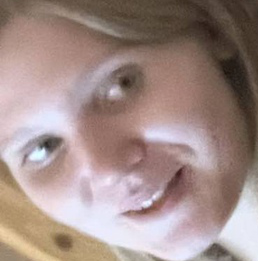

im saved cropped pic


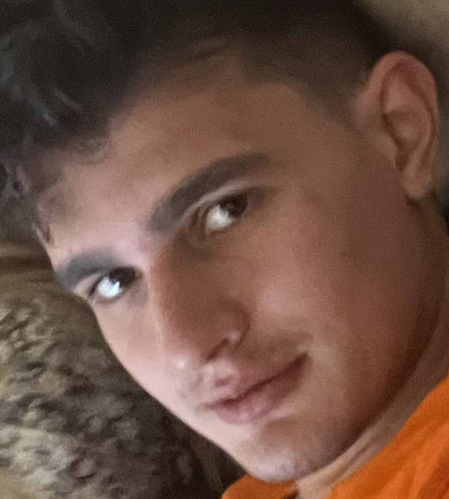

im saved cropped pic


In [10]:
test.general('/content/q5qmX39Suh8IT0DxQiKxceyo_JWMDNr7QJlA6A4V6OWY6Cb1UA6WmwxXmDJ4Sxx24L3LT1wnN9Aiu3AZSdFr5Nec.jpg')

In [166]:
x = test.detect(picture_path='/content/q5qmX39Suh8IT0DxQiKxceyo_JWMDNr7QJlA6A4V6OWY6Cb1UA6WmwxXmDJ4Sxx24L3LT1wnN9Aiu3AZSdFr5Nec.jpg')

Saved 1 image to /content/detected/photo6


In [136]:
y = test.detect(picture_path='/content/dQ6aI-Z-wJBs1FqNMRd-I6qA6UOxw948KAuhpRrmdkQRtQMIPfHkisSjHd5EH6Z9Q_qDvW74zswDg1YUa-siAllt.jpg')

Saved 1 image to /content/detected/photo5


In [130]:
y[0]

tensor([], size=(0, 6))

In [154]:
test.cut_faces(detect_out_photo='/content/dQ6aI-Z-wJBs1FqNMRd-I6qA6UOxw948KAuhpRrmdkQRtQMIPfHkisSjHd5EH6Z9Q_qDvW74zswDg1YUa-siAllt.jpg', lables=y)

Лиц не обнаружено


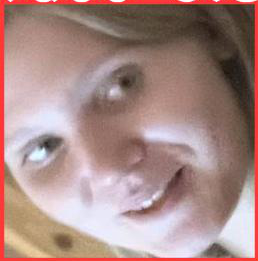

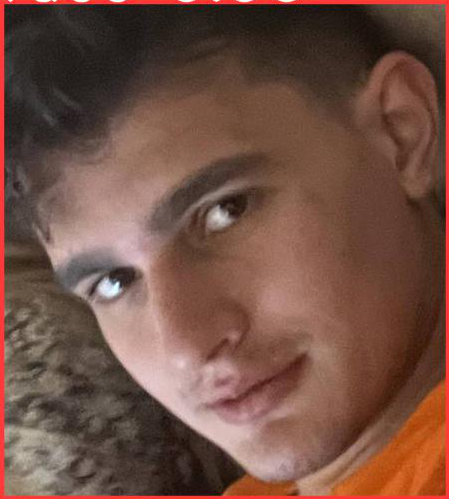

In [176]:
test.cut_faces(detect_out_photo='/content/detected/photo6/q5qmX39Suh8IT0DxQiKxceyo_JWMDNr7QJlA6A4V6OWY6Cb1UA6WmwxXmDJ4Sxx24L3LT1wnN9Aiu3AZSdFr5Nec.jpg',lables=x)

In [97]:
len(x[0]) # сколько лиц он обнаружил
len(x[0][0]) # координаты bbox-a

6

In [108]:
from PIL import Image, ImageFile
img = Image.open('/content/detected/photo2/q5qmX39Suh8IT0DxQiKxceyo_JWMDNr7QJlA6A4V6OWY6Cb1UA6WmwxXmDJ4Sxx24L3LT1wnN9Aiu3AZSdFr5Nec.jpg')

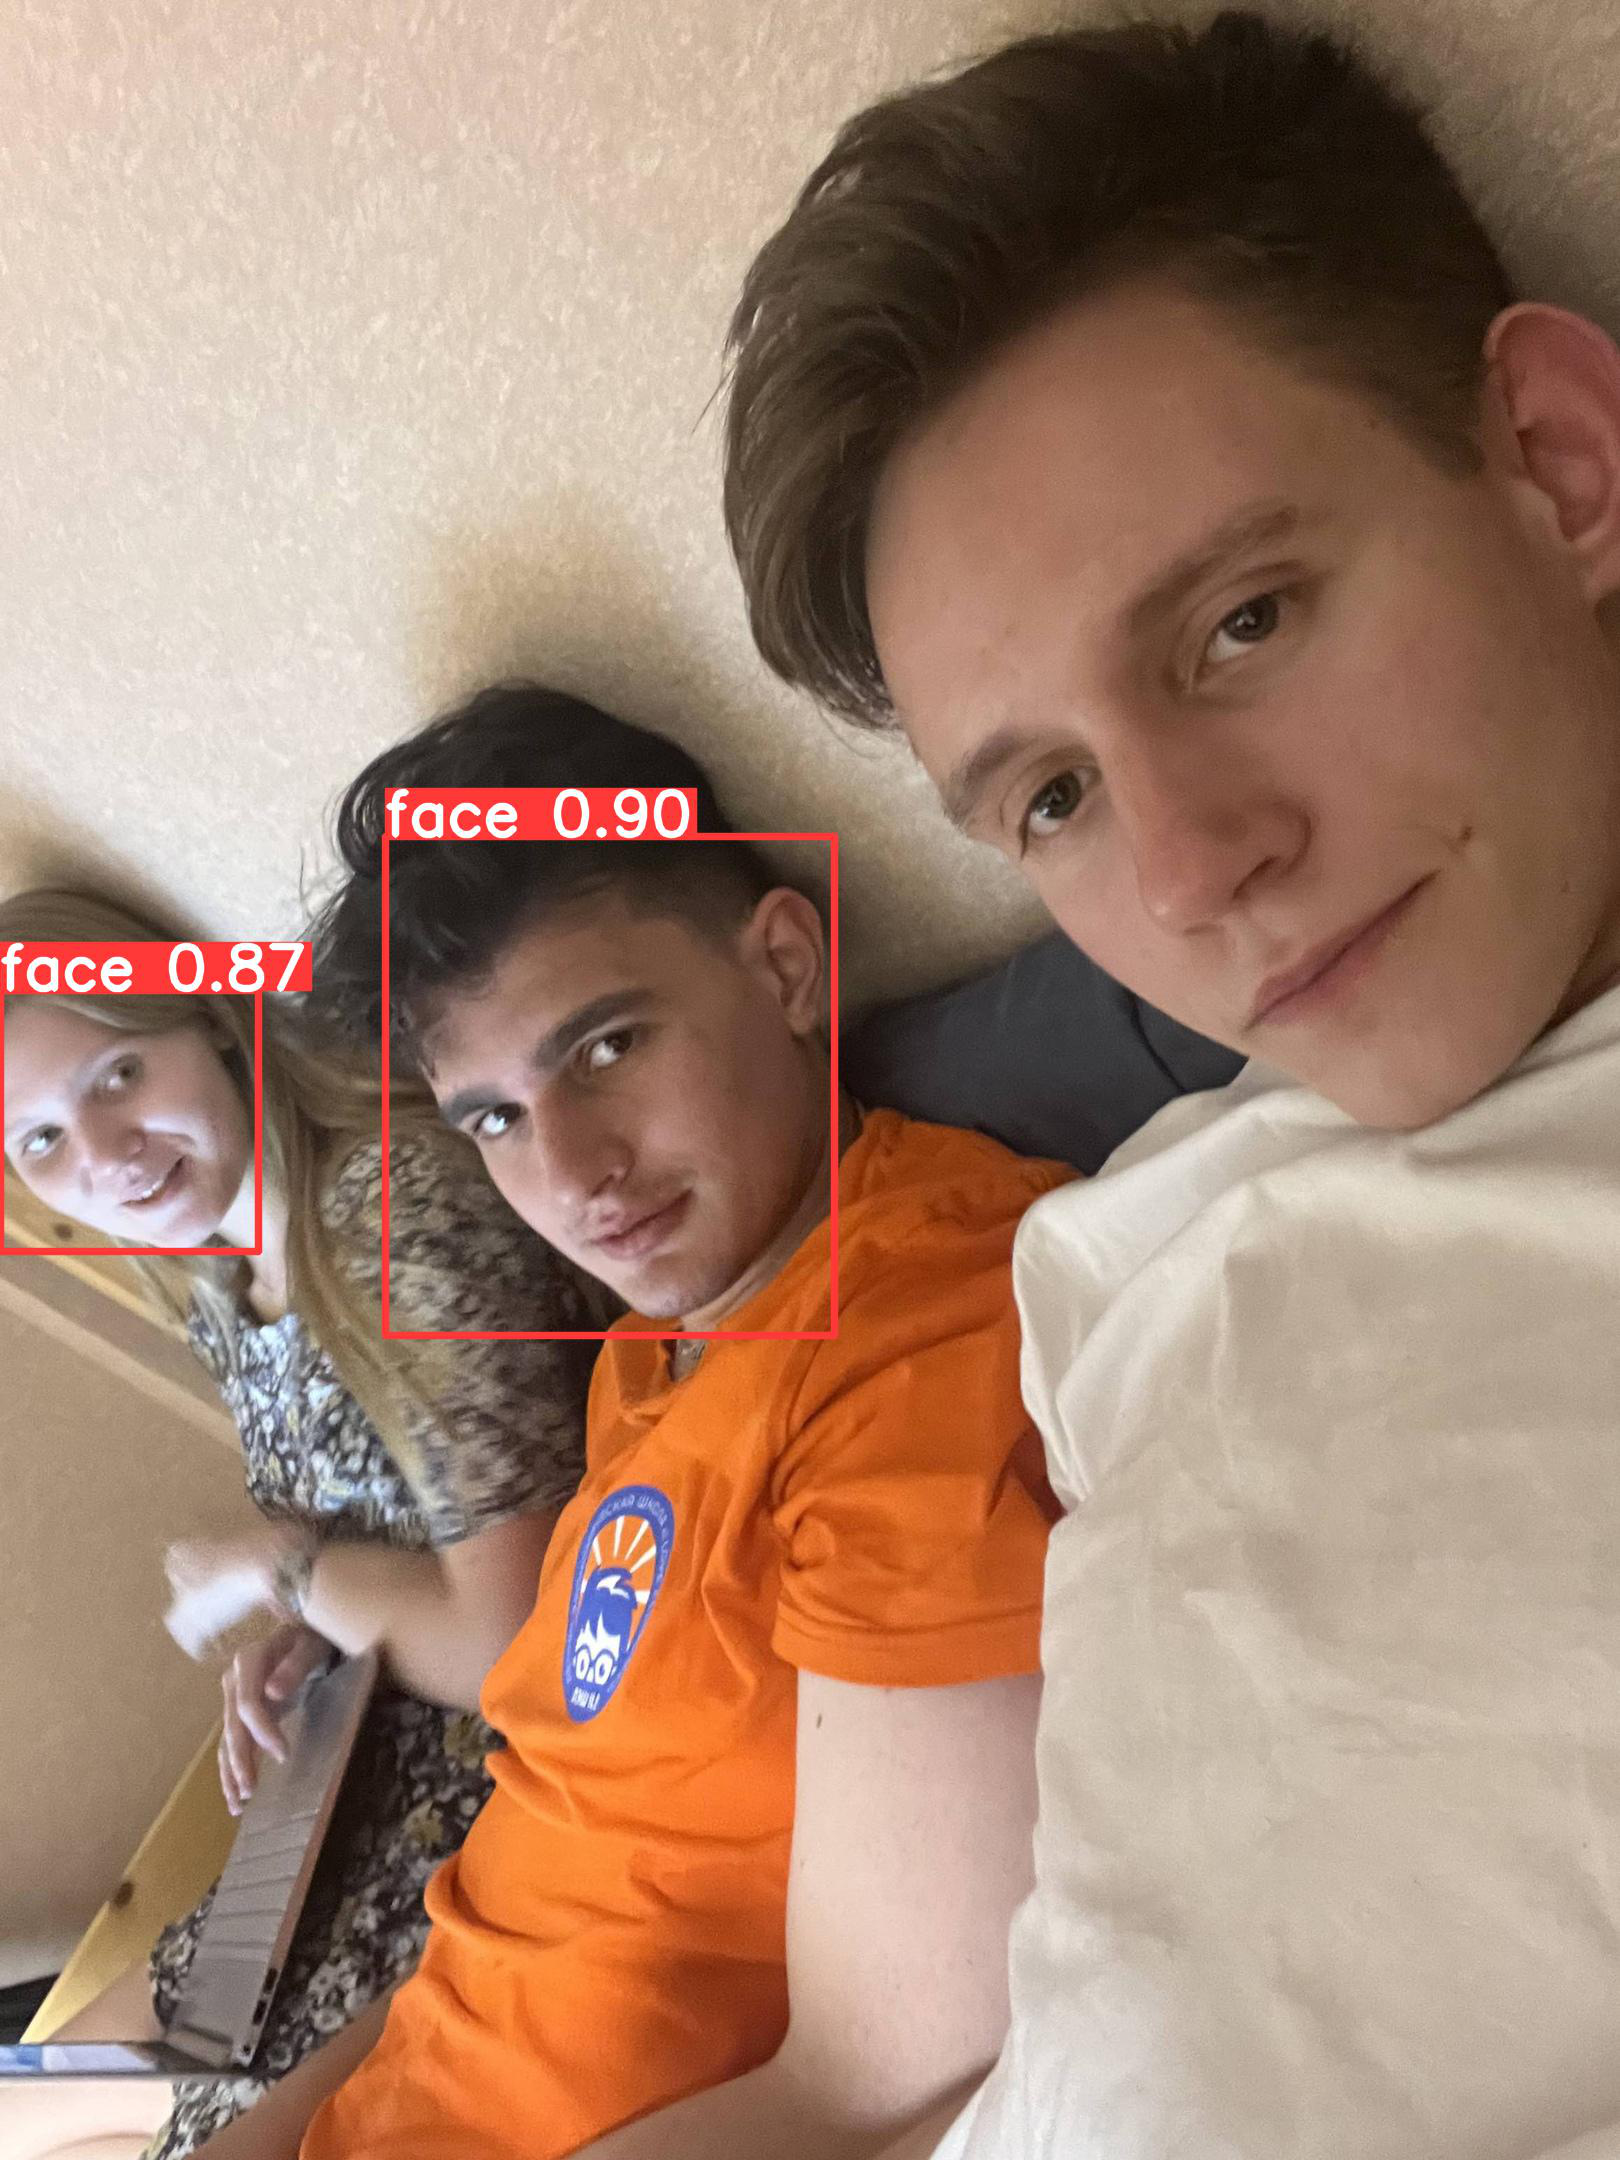

In [109]:
display(img)

In [83]:
img.crop((int(x[0][0][0]), int(x[0][0][1]), int(x[0][0][2]), int(x[0][0][3]))).save('test.jpg', quality=95)

In [112]:
x[0][0].shape

torch.Size([6])